In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('laptop_prices.csv')
df

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [3]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [4]:
# 找出資料缺失的地方
missing_values = df.isnull().sum()
print("缺失值數量:\n", missing_values)
# 找出數據中的不合理值
inconsistent_values = df[(df['Price_euros'] <= 0) | (df['Weight'] <= 0) | (df['CPU_freq'] <= 0)]
print("不合理數據數量:\n", inconsistent_values)

缺失值數量:
 Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64
不合理數據數量:
 Empty DataFrame
Columns: [Company, Product, TypeName, Inches, Ram, OS, Weight, Price_euros, Screen, ScreenW, ScreenH, Touchscreen, IPSpanel, RetinaDisplay, CPU_company, CPU_freq, CPU_model, PrimaryStorage, SecondaryStorage, PrimaryStorageType, SecondaryStorageType, GPU_company, GPU_model]
Index: []

[0 rows x 23 columns]


In [6]:
df['Price_twd'] = df['Price_euros'] * 35


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [7]:
df['OS'].unique() #找出非常見的OS資料


array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [10]:
mask = df['OS'] != 'No OS' and df['OS'] != 'Mac OS X' and df['OS'] != 'Android' and  df['OS'] != 'Windows 10 S'
df2 = df[mask]
df2.info()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [8]:
# 方法一
mask = (df['OS'] != 'No OS') & (df['OS'] != 'Mac OS X') & (df['OS'] != 'Android') & (df['OS'] != 'Windows 10 S')
df2 = df[mask]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Price_euros           1191 non-null   float64
 8   Screen                1191 non-null   object 
 9   ScreenW               1191 non-null   int64  
 10  ScreenH               1191 non-null   int64  
 11  Touchscreen           1191 non-null   object 
 12  IPSpanel              1191 non-null   object 
 13  RetinaDisplay         1191 non-null   object 
 14  CPU_company           1191 non-null   object 
 15  CPU_freq              1191

In [9]:
mask = ~df['OS'].isin(['No OS','Mac OS X','Android','Windows 10 S'])
df_OS_clear = df[mask]
df_OS_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1274
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Price_euros           1191 non-null   float64
 8   Screen                1191 non-null   object 
 9   ScreenW               1191 non-null   int64  
 10  ScreenH               1191 non-null   int64  
 11  Touchscreen           1191 non-null   object 
 12  IPSpanel              1191 non-null   object 
 13  RetinaDisplay         1191 non-null   object 
 14  CPU_company           1191 non-null   object 
 15  CPU_freq              1191

In [10]:
df_OS_clear.drop('Price_euros',axis = 1,inplace = True)
df_OS_clear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1191 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Screen                1191 non-null   object 
 8   ScreenW               1191 non-null   int64  
 9   ScreenH               1191 non-null   int64  
 10  Touchscreen           1191 non-null   object 
 11  IPSpanel              1191 non-null   object 
 12  RetinaDisplay         1191 non-null   object 
 13  CPU_company           1191 non-null   object 
 14  CPU_freq              1191 non-null   float64
 15  CPU_model             1191

C:\Users\t1275\AppData\Local\Temp\ipykernel_527152\844686541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_OS_clear.drop('Price_euros',axis = 1,inplace = True)


In [11]:
df_OS_clear.to_csv('laptop_OS_clear.csv',index = False)
#資料清理完成，存檔

In [ ]:
price_summary = df_OS_clear.groupby(['Company','TypeName'])['Price_twd'].mean().reset_index()
price_summary
# 計算各品牌和類型的平均價格(先略過)

,Company,TypeName,Price_twd
0,Acer,2 in 1 Convertible,20962.537500
1,Acer,Gaming,44043.750000
2,Acer,Netbook,9180.000000
3,Acer,Notebook,16402.460526
4,Acer,Ultrabook,26715.000000
5,Apple,Ultrabook,52488.923077
6,Asus,2 in 1 Convertible,29291.561538
7,Asus,Gaming,52334.590385
8,Asus,Netbook,7248.000000
9,Asus,Notebook,19045.615000


In [12]:
# 設定中文字體
plt.rcParams["font.family"] = "Microsoft YaHei"
plt.rcParams["font.size"] = 16
# 讀取清理後的資料
df = pd.read_csv('laptop_OS_clear.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1191 non-null   object 
 1   Product               1191 non-null   object 
 2   TypeName              1191 non-null   object 
 3   Inches                1191 non-null   float64
 4   Ram                   1191 non-null   int64  
 5   OS                    1191 non-null   object 
 6   Weight                1191 non-null   float64
 7   Screen                1191 non-null   object 
 8   ScreenW               1191 non-null   int64  
 9   ScreenH               1191 non-null   int64  
 10  Touchscreen           1191 non-null   object 
 11  IPSpanel              1191 non-null   object 
 12  RetinaDisplay         1191 non-null   object 
 13  CPU_company           1191 non-null   object 
 14  CPU_freq              1191 non-null   float64
 15  CPU_model            

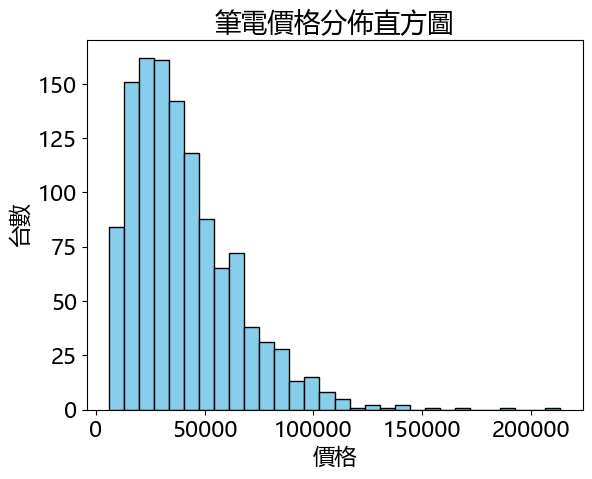

In [13]:
# 繪製筆電價格分佈直方圖
plt.figure()
plt.hist(df['Price_twd'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('價格')
plt.ylabel('台數')
plt.title('筆電價格分佈直方圖')
plt.show()

<Figure size 640x480 with 0 Axes>

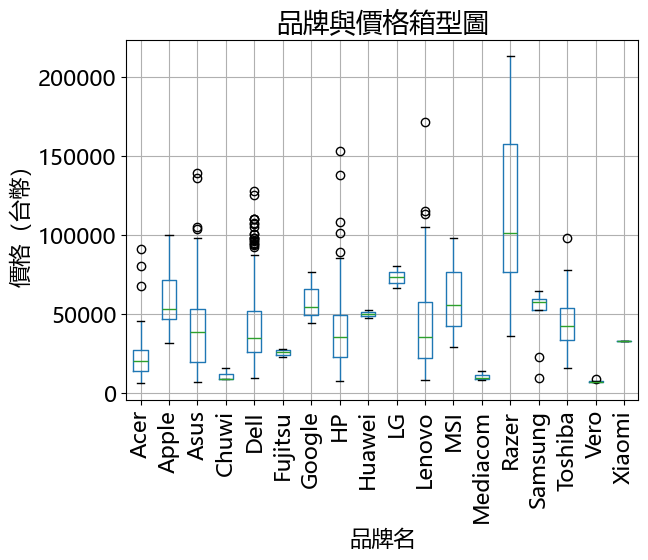

In [14]:
plt.figure()
df.boxplot(column='Price_twd', by='Company', rot=90)
plt.xlabel('品牌名')
plt.ylabel('價格（台幣）')
plt.title('品牌與價格箱型圖')
plt.suptitle('')
plt.show()

C:\Users\t1275\AppData\Local\Temp\ipykernel_527152\3001894441.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


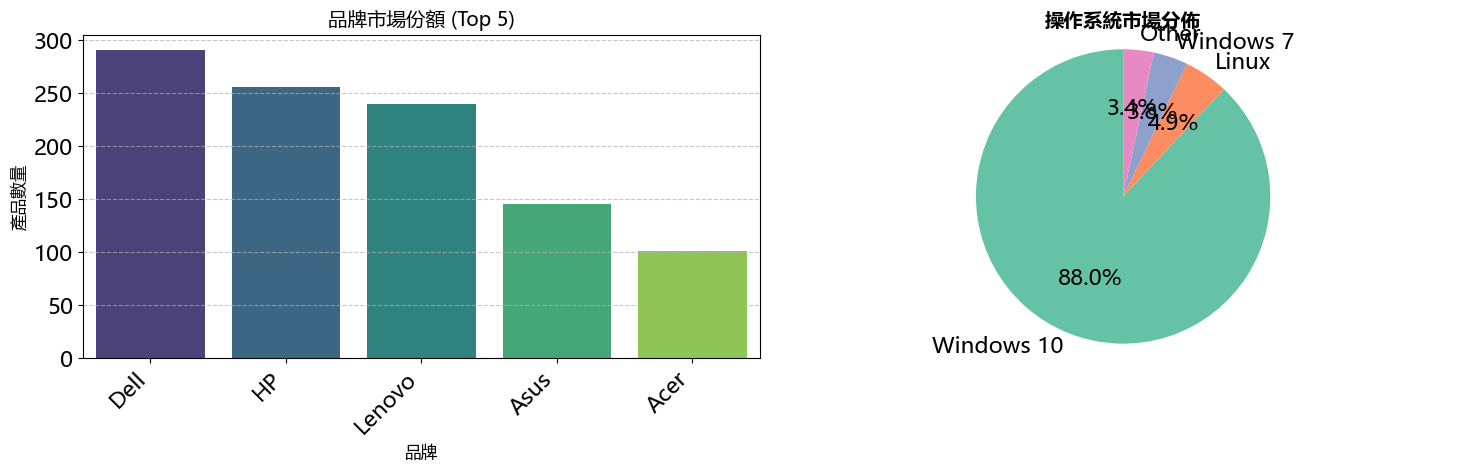

In [15]:
plt.figure(figsize=(15, 5))
# 1. 品牌分佈
plt.subplot(1, 2, 1) # 第一個子圖：品牌分佈
brand_counts = df['Company'].value_counts().nlargest(5) # 取前5大品牌
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.title('品牌市場份額 (Top 5)', fontsize=14)
plt.xlabel('品牌', fontsize=12)
plt.ylabel('產品數量', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 2. 操作系統分佈
plt.subplot(1, 2, 2) # 第二個子圖：操作系統分佈
os_counts = df['OS'].value_counts()
# 篩選出佔比超過 3% 的 OS，其餘歸為 'Other'，使圖表更清晰
threshold = 0.03 * len(df)
os_to_plot = os_counts[os_counts > threshold]
os_other = os_counts[os_counts <= threshold].sum()
if os_other > 0:
    os_to_plot['Other'] = os_other

# 繪製圓餅圖
plt.pie(os_to_plot.values, labels=os_to_plot.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('操作系統市場分佈', fontsize=14, fontweight='bold')
plt.axis('equal') # 確保圓餅圖為圓形
plt.tight_layout()
plt.show()

C:\Users\t1275\AppData\Local\Temp\ipykernel_527152\720366129.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ram', y='Price_twd', data=df_ram_filter.sort_values(by='Ram'), palette="coolwarm")


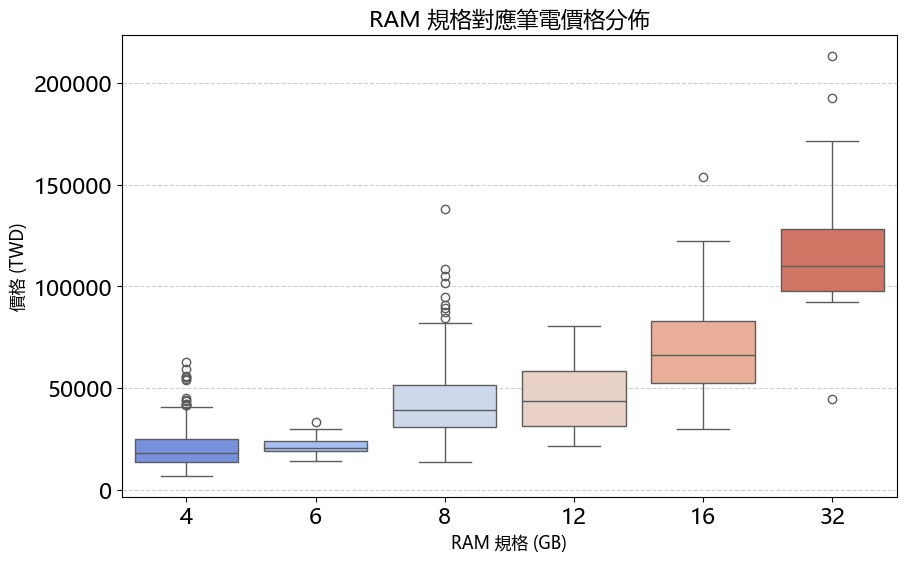

In [16]:
# 繪製 RAM 規格對應筆電價格的箱型圖
# 篩選出常見的 RAM 規格
common_ram = df['Ram'].value_counts().nlargest(6).index
df_ram_filter = df[df['Ram'].isin(common_ram)]

# 追加回歸線
# sns.regplot(x='Ram', y='Price_twd', data=df, scatter=False, color='red')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Ram', y='Price_twd', data=df_ram_filter.sort_values(by='Ram'), palette="coolwarm")
plt.title('RAM 規格對應筆電價格分佈', fontsize=16)
plt.xlabel('RAM 規格 (GB)', fontsize=12)
plt.ylabel('價格 (TWD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

C:\Users\t1275\AppData\Local\Temp\ipykernel_527152\380752127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GPU_company', y='Price_twd', data=df_ram_filter.sort_values(by='GPU_company'), palette="coolwarm")


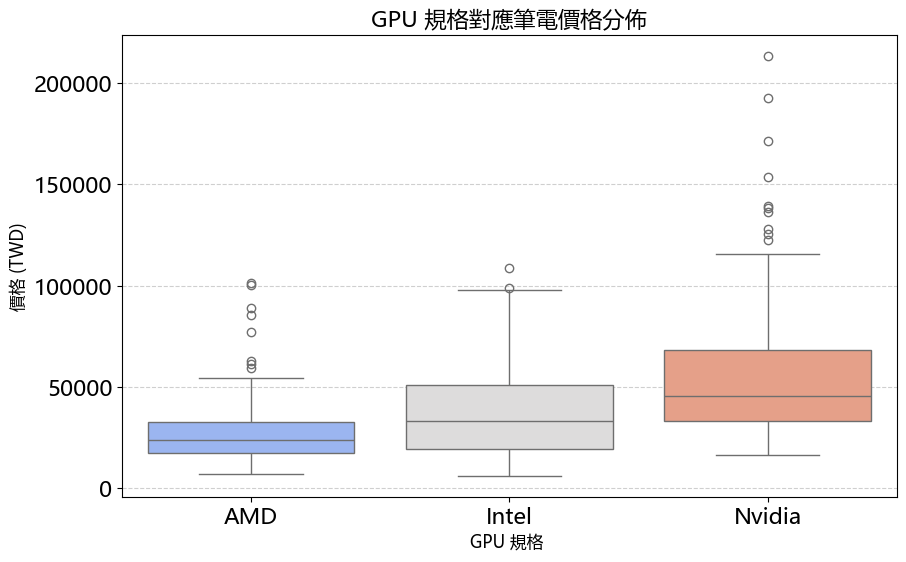

In [17]:
# 繪製 GPU 規格對應筆電價格的盒鬚圖
# 篩選出常見的 GPU 規格，以確保盒鬚圖清晰
common_gpu = df['GPU_company'].value_counts().nlargest(3).index
df_ram_filter = df[df['GPU_company'].isin(common_gpu)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='GPU_company', y='Price_twd', data=df_ram_filter.sort_values(by='GPU_company'), palette="coolwarm")
plt.title('GPU 規格對應筆電價格分佈', fontsize=16)
plt.xlabel('GPU 規格 ', fontsize=12)
plt.ylabel('價格 (TWD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

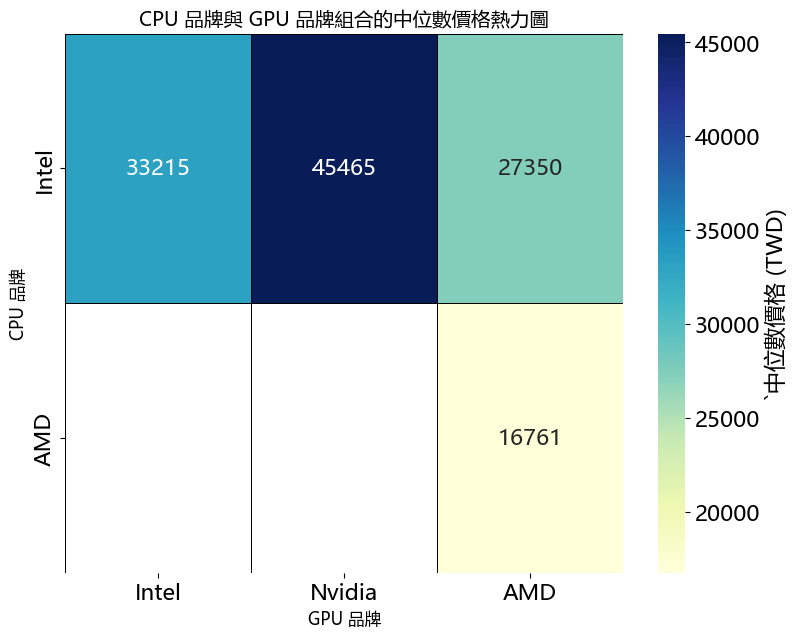

In [18]:
# 聚焦於 CPU 品牌與 GPU 品牌組合
# 創建一個交叉表，計算每個組合的中位數價格，避免極端值影響
price_matrix = df.groupby(['CPU_company', 'GPU_company'])['Price_twd'].median().unstack() # 將 GPU 當欄、CPU 當列，變成矩陣形式

# 選擇前幾個最常見的組合
common_cpu = df['CPU_company'].value_counts().nlargest(2).index
common_gpu = df['GPU_company'].value_counts().nlargest(3).index
price_matrix_filtered = price_matrix.loc[common_cpu, common_gpu].dropna(how='all', axis=1).dropna(how='all', axis=0)


plt.figure(figsize=(9, 7))
# 使用 fmt=".0f" 確保顯示整數價格
sns.heatmap(price_matrix_filtered, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'ˋ中位數價格 (TWD)'}, linewidths=.5, linecolor='black')
plt.title('CPU 品牌與 GPU 品牌組合的中位數價格熱力圖', fontsize=14)
plt.xlabel('GPU 品牌', fontsize=12)
plt.ylabel('CPU 品牌', fontsize=12)
plt.show()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 讀取資料
df = pd.read_csv("laptop_OS_clear.csv")

# 2. 數據預處理
#   a. 處理類別型特徵 (使用 Label Encoding)
categorical_features = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 
                         'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
                         'CPU_company', 'CPU_model', 'PrimaryStorageType',
                         'SecondaryStorageType', 'GPU_company', 'GPU_model']

for col in categorical_features:
    if col in df.columns:
         le = LabelEncoder()
         df[col] = le.fit_transform(df[col].astype(str))  # 將可能為文字的資料型態轉換成特定數字做分類

#   b. 處理數值型特徵 (使用 StandardScaler)
#  處理資料中數值型的特徵。先將這些特徵轉換成數字，並處理可能存在的缺失值。將所有數值特徵的值縮放到相似的範圍，這樣可以讓機器學習模型更好地學習這些特徵，並且提升模型的預測準確度。
numerical_features = ['Inches', 'Ram', 'Weight', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

for col in numerical_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)


scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numerical_features])
numerical_features_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features)
df[numerical_features] = numerical_features_scaled


#  c. 特徵選擇 (將目標變數 Price_twd 移出特徵)
target = 'Price_twd'
features = df.drop(target, axis=1).columns

# 3. 分割資料集 (訓練集、測試集)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 建立並訓練模型 (Linear Regression, Random Forest, Gradient Boosting)
#   a. 線性迴歸模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#   b. 隨機森林迴歸模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#   c. 梯度提升機迴歸模型
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)


C:\Users\t1275\AppData\Local\Temp\ipykernel_488148\2372378143.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [3]:
# 5. 模型評估 (均方誤差 MSE, R2分數)
#   a. 線性迴歸模型
y_pred_lr_train = lr_model.predict(X_train)
y_pred_lr_test = lr_model.predict(X_test)
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
print("線性迴歸模型:")
print(f"  訓練集 MSE: {mse_lr_train:.2f}")
print(f"  訓練集 R2 : {r2_lr_train:.2f}")
print(f"  測試集 MSE: {mse_lr_test:.2f}")
print(f"  測試集 R2 : {r2_lr_test:.2f}")

線性迴歸模型:
  訓練集 MSE: 126912805.70
  訓練集 R2 : 0.72
  測試集 MSE: 115901417.01
  測試集 R2 : 0.75


In [4]:
#   b. 隨機森林迴歸模型
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)
mse_rf_train = mean_squared_error(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
print("隨機森林迴歸模型:")
print(f"  訓練集 MSE: {mse_rf_train:.2f}")
print(f"  訓練集 R2 : {r2_rf_train:.2f}")
print(f"  測試集 MSE: {mse_rf_test:.2f}")
print(f"  測試集 R2 : {r2_rf_test:.2f}")

隨機森林迴歸模型:
  訓練集 MSE: 9576528.60
  訓練集 R2 : 0.98
  測試集 MSE: 62406333.66
  測試集 R2 : 0.86


In [5]:
#   c. 梯度提升機迴歸模型
y_pred_gb_train = gb_model.predict(X_train)
y_pred_gb_test = gb_model.predict(X_test)
mse_gb_train = mean_squared_error(y_train, y_pred_gb_train)
r2_gb_train = r2_score(y_train, y_pred_gb_train)
mse_gb_test = mean_squared_error(y_test, y_pred_gb_test)
r2_gb_test = r2_score(y_test, y_pred_gb_test)
print("梯度提升機迴歸模型:")
print(f"  訓練集 MSE: {mse_gb_train:.2f}")
print(f"  訓練集 R2 : {r2_gb_train:.2f}")
print(f"  測試集 MSE: {mse_gb_test:.2f}")
print(f"  測試集 R2 : {r2_gb_test:.2f}")

梯度提升機迴歸模型:
  訓練集 MSE: 30156247.29
  訓練集 R2 : 0.93
  測試集 MSE: 67105866.44
  測試集 R2 : 0.85


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. 讀取資料
df = pd.read_csv("laptop_OS_clear.csv")

# 2. 數據預處理
#   a. 處理類別型特徵 (使用 Label Encoding)
categorical_features = ['Company', 'Product', 'TypeName', 'OS', 'Screen', 
                         'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay',
                         'CPU_company', 'CPU_model', 'PrimaryStorageType',
                         'SecondaryStorageType', 'GPU_company', 'GPU_model']

for col in categorical_features:
    if col in df.columns:
         le = LabelEncoder()
         df[col] = le.fit_transform(df[col].astype(str))  # 处理缺失值和未知值

#   b. 處理數值型特徵 (使用 StandardScaler)
numerical_features = ['Inches', 'Ram', 'Weight','CPU_freq', 'PrimaryStorage', 'SecondaryStorage']

for col in numerical_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)


scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numerical_features])
numerical_features_scaled = pd.DataFrame(numerical_features_scaled, columns=numerical_features)
df[numerical_features] = numerical_features_scaled


#  c. 特徵選擇 (將目標變數 Price_twd 移出特徵)
target = 'Price_twd'
features = df.drop(target, axis=1).columns

# 3. 分割資料集 (訓練集、測試集)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 建立並訓練模型 (Linear Regression, Random Forest, Gradient Boosting)
#   a. 線性迴歸模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#   b. 隨機森林迴歸模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#   c. 梯度提升機迴歸模型
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# 5. 模型評估 (均方誤差 MSE, R2分數)
#   a. 線性迴歸模型
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("線性迴歸模型:")
print(f"  MSE: {mse_lr:.2f}")
print(f"  R2 : {r2_lr:.2f}")

#   b. 隨機森林迴歸模型
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("隨機森林迴歸模型:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  R2 : {r2_rf:.2f}")


#   c. 梯度提升機迴歸模型
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("梯度提升機迴歸模型:")
print(f"  MSE: {mse_gb:.2f}")
print(f"  R2 : {r2_gb:.2f}")

C:\Users\t1275\AppData\Local\Temp\ipykernel_488148\29761351.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


線性迴歸模型:
  MSE: 115901417.01
  R2 : 0.75
隨機森林迴歸模型:
  MSE: 62406333.66
  R2 : 0.86
梯度提升機迴歸模型:
  MSE: 67105866.44
  R2 : 0.85
